# KEN1435 - Principles of Data Science | Homework Assignment 1 (HA1) :  Comparing COVID Fatalities

In this assignment, you will compare COVID fatalities in Portugal and Colombia. The results may be counterintuitive and surprising! We will use data of COVID cases from both countries on May 28, 2020.

First we load the necessary python packages

This notebook was done in collaboration with: Denisa Nastasa and Taha Koc

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

The Portugal and Colombia data are contained in separate files. 

## Portuguese COVID fatality rate
Let's start by loading the Portuguese data which is stored in the file called `portugal_2020-05-28.csv`.

In [52]:
df_PT = pd.read_csv("C:/Users/timis/DataspellProjects/PrinciplesOfDataScience/Assignment1/Data/portugal_2020-05-28.csv") # I could only load the data this way, please replace with your path to the data
df_PT.head()

,age,sex,fatality
0,60-69,Female,0
1,60-69,Male,0
2,80+,Male,0
3,60-69,Female,0
4,50-59,Female,0


**Exercise 1. (*1pt*)** Calculate the overall fatality rate for Portugal. That is, calculate $$P(\text{fatality} = 1 | \text{country}=\text{Portugal}).$$ Store your answer in the variable `fatal_PT` as you will need to use this value in the final exercise.

>### Comment
>after a bit of tinkering we found out, that since we have only 1s and 0s we can just calculate the mean, since wed then still have the correct value (sum of all values / all values) since the sum is going to be the size of all occurrences of one

In [53]:
## YOUR CODE HERE
dead_PT = (df_PT["fatality"] == 1).sum()
non_fatal_pt = (df_PT["fatality"] == 0).sum()
fatal_PT_alternate_way = dead_PT / (non_fatal_pt + dead_PT)
fatal_PT = df_PT["fatality"].mean()
fatal_PT, fatal_PT_alternate_way

(0.04332826940119002, 0.04332826940119002)

**Exercise 2. (*1pt*)** Calculate the fatality rates for each age group in Portugal. That is, calculate the conditional probabilities for each age group:
$$P(\text{fatality} = 1 | \text{age}\in[a,b], \text{country}=\text{Portugal}).$$
Save the results in a `pd.Series` called `fatality_rates_PT`.

In [54]:
## YOUR CODE HERE
grouped_PT = df_PT.groupby("age")
fatality_rates_PT = grouped_PT["fatality"].mean()
fatality_rates_PT

age
0-9      0.000000
10-19    0.000000
20-29    0.000243
30-39    0.000211
40-49    0.002822
50-59    0.007995
60-69    0.035017
70-79    0.106031
80+      0.205180
Name: fatality, dtype: float64

In [55]:
df_PT["age"].unique()

array(['60-69', '80+', '50-59', '40-49', '20-29', '30-39', '70-79',
       '10-19', '0-9'], dtype=object)

## Colombian fatality rate

Next we load the Colombian data from the file `colombia_2020-05-28.csv`. 

In [56]:
df_CO = pd.read_csv("C:/Users/timis/DataspellProjects/PrinciplesOfDataScience/Assignment1/Data/colombia_2020-05-28.csv") # I could only load the data this way, please replace with your path to the data
df_CO

,Departamento,Edad,Sexo,Tipo,Ubicación,Estado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha recuperado
0,Bogotá D.C.,19,F,Importado,Recuperado,Leve,2020-02-27,- -,2020-03-06,2020-03-13
1,Valle del Cauca,34,M,Importado,Recuperado,Leve,2020-03-04,- -,2020-03-09,2020-03-19
2,Antioquia,50,F,Importado,Recuperado,Leve,2020-02-29,- -,2020-03-09,2020-03-15
3,Antioquia,55,M,Relacionado,Recuperado,Leve,2020-03-06,- -,2020-03-11,2020-03-26
4,Antioquia,25,M,Relacionado,Recuperado,Leve,2020-03-08,- -,2020-03-11,2020-03-23
...,...,...,...,...,...,...,...,...,...,...
25361,Buenaventura D.E.,48,M,En estudio,Hospital,Moderado,2020-05-12,- -,2020-05-28,NaN
25362,Valle del Cauca,55,F,En estudio,Casa,Leve,2020-05-21,/ /,2020-05-28,NaN
25363,Buenaventura D.E.,39,F,En estudio,Casa,Leve,2020-05-23,/ /,2020-05-28,NaN
25364,Valle del Cauca,13,F,En estudio,Casa,Leve,2020-05-13,/ /,2020-05-28,NaN


Notice that the Colombia data is more raw than the Portugal data. We need to clean the data to make it look like the Portugal data. For instance, it does not contain a boolean "fatality" column and the ages ("Edad") are indicated as exact ages rather than binned values as we can see for the Portuguese data.

As a first step, we will create a column called fatality which indicates whether a patient died or not by transforming the "Estado" (state) column into a fatality column. If a patient died, then their state is marked as "Fallecido" (deceased). There are other "Estados" (states), such as "Leve" (mild) and "Asintomático" (asymptomatic), but these are not relevant for our fatality column.

**Exercise 3. (*1pt*)** Add a column called "fatality" to the Colombian dataframe `df_CO`, which contains a `1` if the "Estado"-column states "Fallecido" and a `0` otherwise.

In [57]:
## YOUR CODE HERE
# Replace function was done with the help of AI
# Create mapping to convert String to float
# After doing the other exercises i realized i had to add additional mappings since there are more values
mapping = {"Fallecido" : 1,  "Asintomático" : 0, "Moderado" : 0, "Grave" : 0, "leve" : 0, "LEVE" : 0,"Leve " : 0, 'Leve                                                                                                                                                                                                    ' : 0, 'Leve' : 0, "NaN" : 0, "Moderado " : 0}
# Replace the values
df_CO["fatality"] = df_CO["Estado"].replace(mapping)
df_CO["fatality"].unique()


array([ 0.,  1., nan])

Next, we need to convert "Edad" (age), which is a quantitative variable in this data set, into age ranges, as in the Portugal data set.

**Exercise 4. (*1pt*)** Add a column called "age" to the Colombian dataframe `df_CO`, which divided the "Edad" column into the following age ranges: `"0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"`

In [58]:
## YOUR CODE HERE
bins = [0,9, 19, 29, 39,49, 59, 69, 79, 100]
labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
df_CO["age"] = pd.cut(df_CO["Edad"], bins = bins, labels=labels, include_lowest=True)
df_CO

,Departamento,Edad,Sexo,Tipo,Ubicación,Estado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha recuperado,fatality,age
0,Bogotá D.C.,19,F,Importado,Recuperado,Leve,2020-02-27,- -,2020-03-06,2020-03-13,0.0,10-19
1,Valle del Cauca,34,M,Importado,Recuperado,Leve,2020-03-04,- -,2020-03-09,2020-03-19,0.0,30-39
2,Antioquia,50,F,Importado,Recuperado,Leve,2020-02-29,- -,2020-03-09,2020-03-15,0.0,50-59
3,Antioquia,55,M,Relacionado,Recuperado,Leve,2020-03-06,- -,2020-03-11,2020-03-26,0.0,50-59
4,Antioquia,25,M,Relacionado,Recuperado,Leve,2020-03-08,- -,2020-03-11,2020-03-23,0.0,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...
25361,Buenaventura D.E.,48,M,En estudio,Hospital,Moderado,2020-05-12,- -,2020-05-28,NaN,0.0,40-49
25362,Valle del Cauca,55,F,En estudio,Casa,Leve,2020-05-21,/ /,2020-05-28,NaN,0.0,50-59
25363,Buenaventura D.E.,39,F,En estudio,Casa,Leve,2020-05-23,/ /,2020-05-28,NaN,0.0,30-39
25364,Valle del Cauca,13,F,En estudio,Casa,Leve,2020-05-13,/ /,2020-05-28,NaN,0.0,10-19


**Exercise 5. (*1pt*)** Calculate the overall fatality rate for Colombia. That is, calculate $$P(\text{fatality} = 1 | \text{country}=\text{Colombia}).$$ Store your answer in the variable `fatal_CO` as you will need to use this value in the final exercise.

In [59]:
## YOUR CODE HERE
## Since we have a lot of different datatypes that cant really be cleaned with the mapping functions, we just take the sum  of all occurrences in the column that equal one and divide it by the total occurences (I did thi in a bit of a "workaround" way, because its easier to understand my thought process that way
cleaned_CO = df_CO["fatality"].fillna(0)
fatal_CO = (cleaned_CO == 1).sum()
surived_CO = (cleaned_CO != 1).sum()
fatal_CO = fatal_CO / (surived_CO + fatal_CO)
fatal_CO

0.03240558227548687

**Exercise 6. (*1pt*)** Calculate the fatality rates for each age group in Colombia. That is, calculate the conditional probabilities for each age group:
$$P(\text{fatality} = 1 | \text{age}\in[a,b], \text{country}=\text{Colombia}).$$
Save the results in a `pd.Series` called `fatality_rates_CO`.

In [60]:
## YOUR CODE HERE
## Calculate the sum per age group
grouped_CO = df_CO.groupby("age")["fatality"]
fatality_rates_CO = grouped_CO.mean()
fatality_rates_CO

age
0-9      0.004537
10-19    0.000513
20-29    0.002318
30-39    0.004277
40-49    0.015144
50-59    0.036857
60-69    0.098260
70-79    0.192446
80+      0.281711
Name: fatality, dtype: float64

*## Visualizing the outcomes

**Exercise 7. (*4pt*)** Make a bar plot comparing the fatality rates for each age group in Colombia and Portugal. Also include horizontal dashed lines that display the fatality rates for each country as a whole. Ensure that the bars and the dashed line for each country have the same colors!

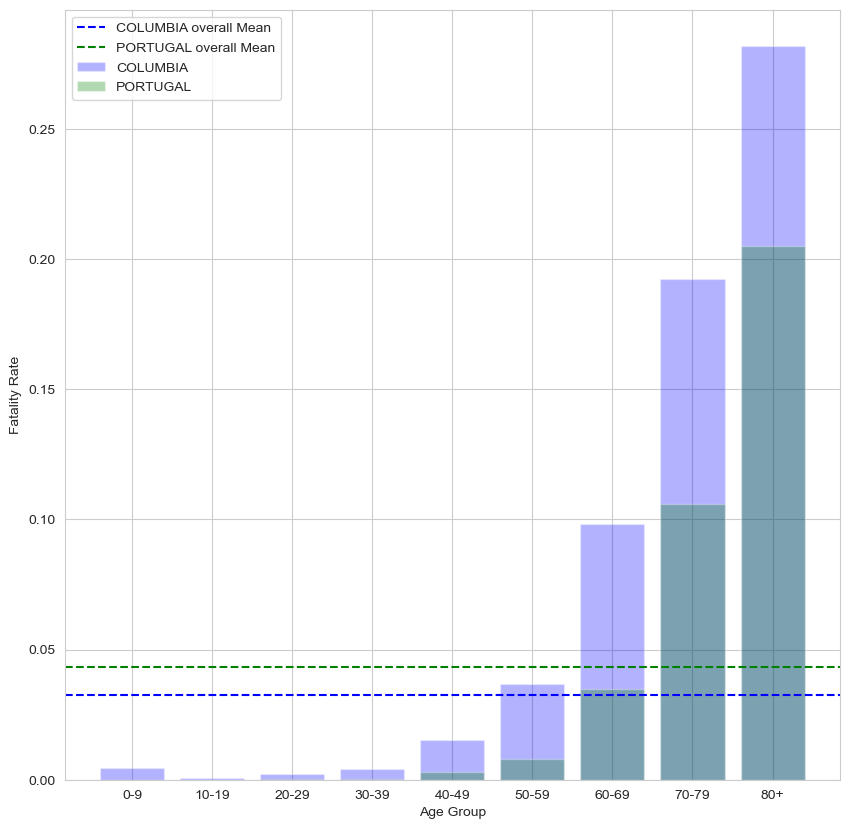

In [61]:
## YOUR CODE HERE
plt.figure(figsize=(10,10))

mean_overall_pt = df_PT["fatality"].mean()
mean_overall_co = df_CO["fatality"].mean()

plt.bar(fatality_rates_CO.index, fatality_rates_CO.values, color = "b", alpha = 0.3, label = "COLUMBIA")
plt.bar(fatality_rates_PT.index, fatality_rates_PT.values, color = "g", alpha = 0.3, label = "PORTUGAL")

plt.axhline(y = mean_overall_co, color = "b" , linestyle = "--", label = "COLUMBIA overall Mean")
plt.axhline(y = mean_overall_pt, color = "g", linestyle = "--", label = "PORTUGAL overall Mean")
plt.legend()
plt.xlabel("Age Group")
plt.ylabel("Fatality Rate")

plt.show()

***BONUS (1pt): Do you notice anything strange? Can you explain what is going on?***

OPTIONAL: YOUR ANSWER HERE

Even though the fatality rates per age group are a lot higher in Columbia, the mean is a lot lower. This could be due to a multidute of factors (Healthcare, Socioeconomic Factors. etc.) but it could also be due to the fact that the Dataset sizes vary which impacts the mean by a lot.